In [2]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
place_name = "Berlin, Germany "

In [4]:
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

In [5]:
area

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((13.08834 52.41963, 13.09021 52...",13.088345,52.338245,13.761161,52.675509,134060781,relation,62422,52.510885,13.398937,boundary,administrative,8,0.840425,city,Berlin,"Berlin, Germany"


<Axes: >

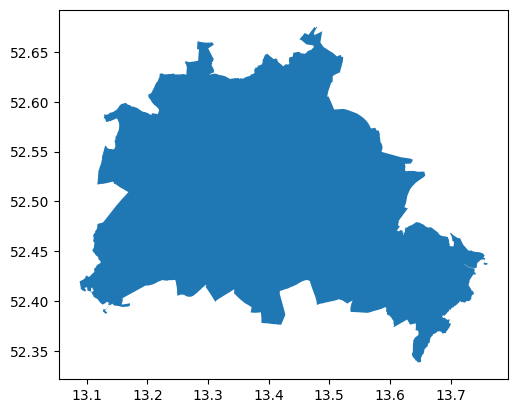

In [6]:
area.plot()

In [7]:
tags = {"boundary": "administrative", "admin_level": "10"}


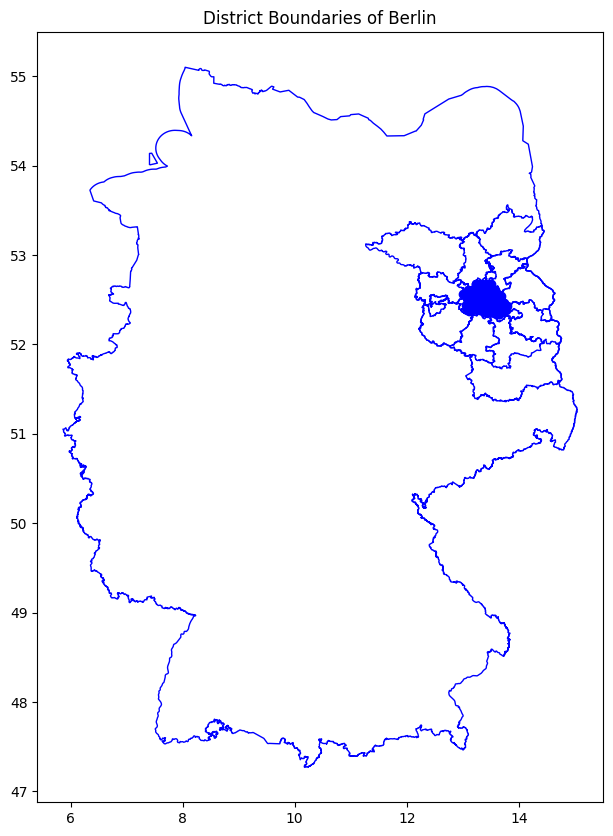

In [9]:
# Step 2: Retrieve District Boundaries
districts_gdf = ox.features_from_place(place_name, tags)

# Step 3: Plot Districts
fig, ax = plt.subplots(figsize=(10, 10))
districts_gdf.boundary.plot(ax=ax, color="blue", linewidth=1)
plt.title("District Boundaries of Berlin")
plt.show()

In [11]:
# Step 2: Retrieve District Boundaries
districts_gdf = ox.features_from_place(place_name, tags)

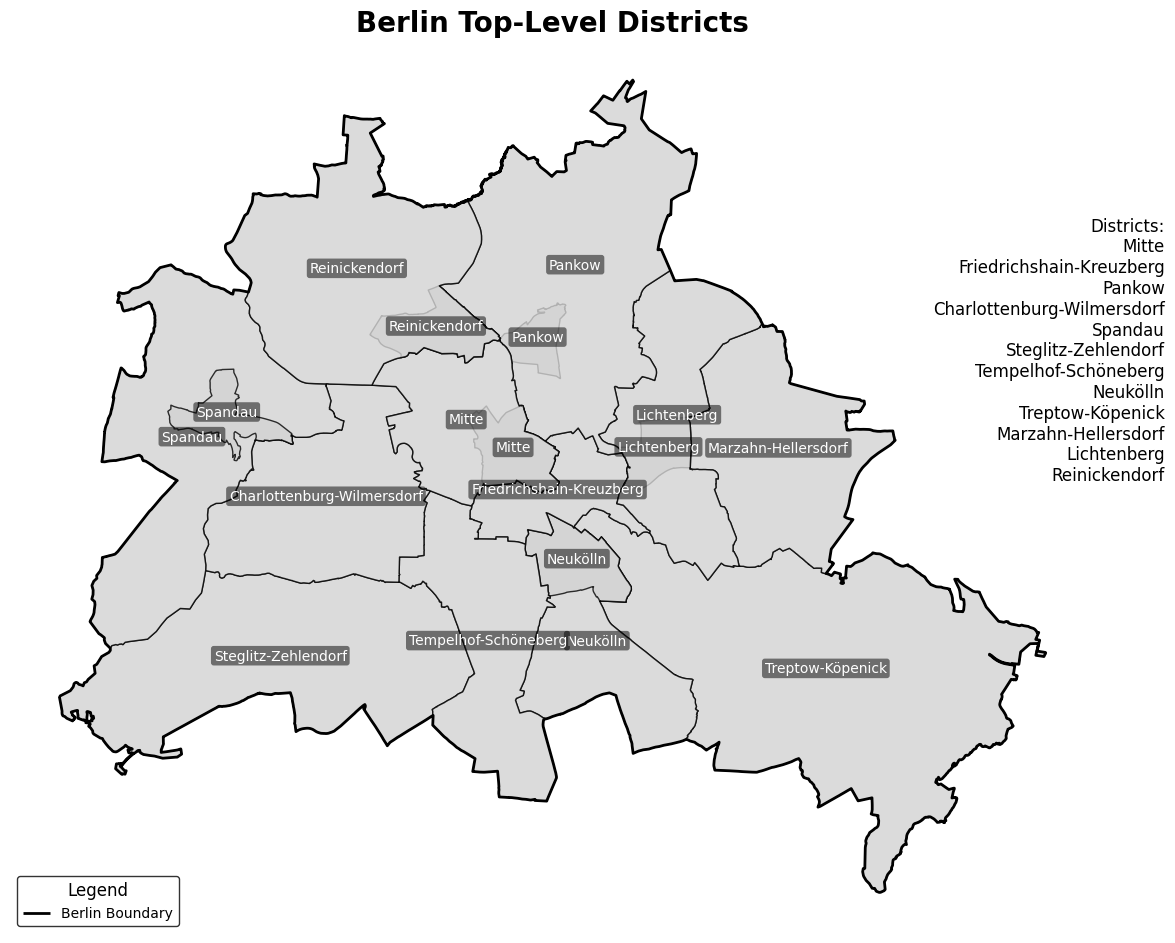

In [24]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt



# Step 2: Retrieve Top-Level Districts (admin_level=6)
tags = {"boundary": "administrative", "admin_level": "6"}  # Top-level district level
all_districts_gdf = ox.features_from_place("Berlin, Germany", tags)

# Step 3: Filter for the Desired Top-Level Districts
district_names = [
    "Mitte",
    "Friedrichshain-Kreuzberg",
    "Pankow",
    "Charlottenburg-Wilmersdorf",
    "Spandau",
    "Steglitz-Zehlendorf",
    "Tempelhof-Schöneberg",
    "Neukölln",
    "Treptow-Köpenick",
    "Marzahn-Hellersdorf",
    "Lichtenberg",
    "Reinickendorf",
]
filtered_districts = all_districts_gdf[all_districts_gdf["name"].isin(district_names)]

# Step 4: Clip Districts to Berlin Boundary (Optional)
filtered_districts_clipped = gpd.clip(filtered_districts, berlin_boundary)

# Step 5: Retrieve Bar Locations in Berlin
bar_tags = {"amenity": "bar"}
bars = ox.features_from_place("Berlin, Germany", bar_tags)

# Step 6: Clip Bars to Berlin Boundary
bars_clipped = gpd.clip(bars, berlin_boundary)

# Step 7: Plot the Top-Level Districts and Bars
fig, ax = plt.subplots(figsize=(14, 12))



# Plot each district with a unique color
filtered_districts_clipped.plot(
    ax=ax,
    # column="name",  # Column to base colors on (district names)
    # cmap="tab20",   # Colormap for distinct colors
    legend=False,
    color ="lightgray",
    alpha=0.8,
    #edgecolor="black",
    edgecolor = "black"
)

# Plot Berlin boundary
berlin_boundary.boundary.plot(ax=ax, color="black", linewidth=2, label="Berlin Boundary")

# Plot Bars as red points
"""bars_clipped.plot(
    ax=ax,
    color="red",
    alpha=0.6,
    markersize=10,
    label="Bars",
)""" 

# Add labels for district names
for idx, row in filtered_districts_clipped.iterrows():
    centroid = row.geometry.centroid
    ax.text(
        centroid.x, centroid.y,
        row["name"],  # Use district name
        fontsize=10,
        ha="center",
        color="white",
        bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", boxstyle="round,pad=0.2")
    )

# Title and Axis Labels
plt.title("Berlin Top-Level Districts", fontsize=20, weight="bold")
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Remove axis borders and ticks
ax.axis("off")

# Add Legend
legend_labels = "\n".join(district_names)
# Add Legend for Bars Only
legend = ax.legend(
    loc="lower left",  # Position of the legend
    fontsize=10,
    title="Legend",  # Legend title
    title_fontsize=12,
    frameon=True,
    framealpha=0.8,  # Semi-transparent background
    edgecolor="black",
)
legend.get_frame().set_facecolor("white")  # Set legend background color

plt.figtext(0.95, 0.5, f"Districts:\n{legend_labels}", fontsize=12, ha="right")

plt.show()

In [17]:
bars.to_csv("bars_in_berlin.csv", index=False)

In [25]:
import os
print(os.getcwd())

/home/ayman-jalal/Desktop/Uni/UA


Missing values:
 geometry                      0
boundary                      0
name                        618
ref                         811
admin_level                   0
                           ... 
state_code                  919
alt_name:pt                 919
addr:postcode               919
ref:old                     918
admin_centre:postal_code    916
Length: 391, dtype: int64


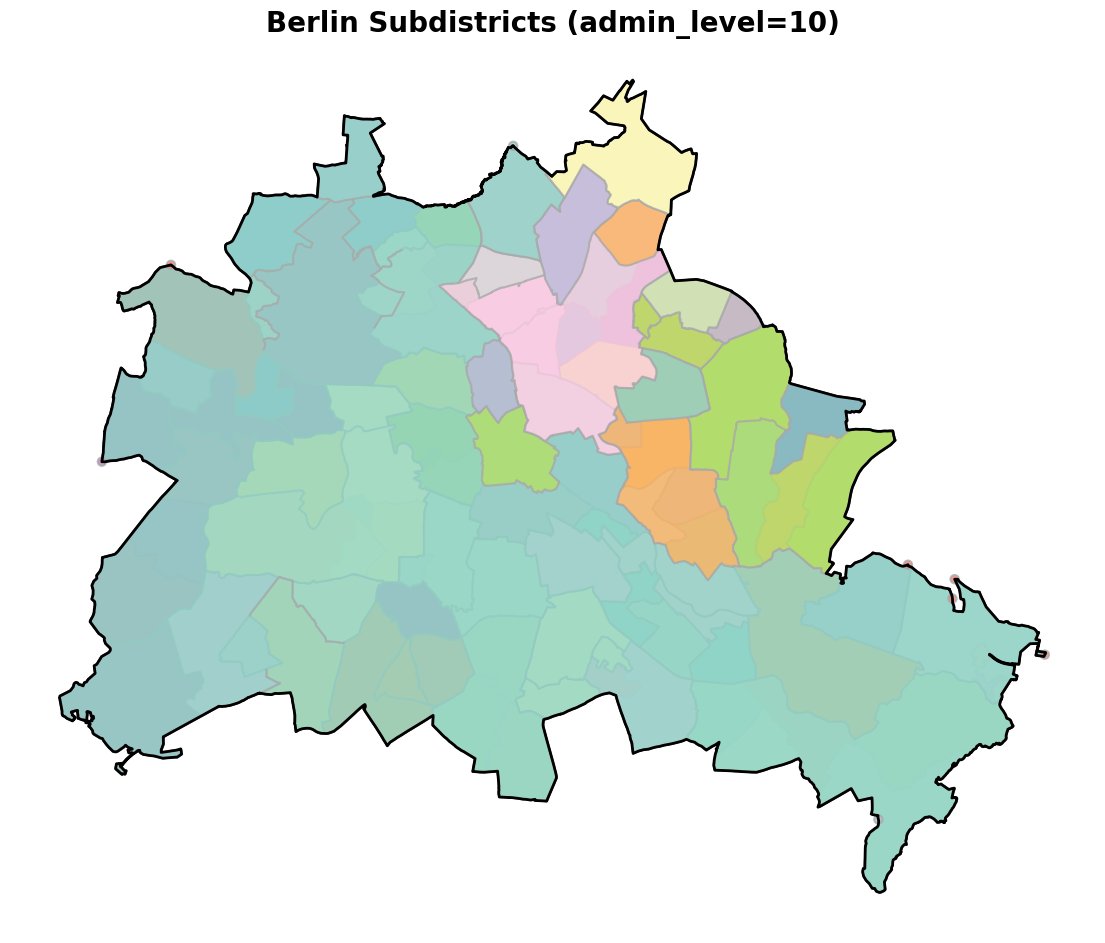

In [49]:

# Step 1: Get Berlin Boundary
berlin_boundary = ox.geocode_to_gdf("Berlin, Germany")

# Step 2: Retrieve All Subdistricts (admin_level=10)
tagz = {"boundary": "administrative", "admin_level": "10"}
subdistricts_gdf = ox.features_from_place("Berlin, Germany", tagz)

# Check for missing values in each column
missing_values = subdistricts_gdf.isnull().sum()
print("Missing values:\n", missing_values)

# Step 3: Clip Subdistricts to Berlin Boundary (Optional)
subdistricts_clipped = gpd.clip(subdistricts_gdf, berlin_boundary)

# Step 4: Plot Subdistricts
fig, ax = plt.subplots(figsize=(14, 12))

# Plot subdistricts with unique colors
subdistricts_clipped.plot(
    ax=ax,
    column="name",  # Color based on name
    cmap="Set3",   # Colormap for distinct colors
    legend=False,
    alpha=0.8,
    edgecolor="darkgrey",
    linewidth =1.5  # Add boundaries for subdistricts
)

# Plot Berlin boundary
berlin_boundary.boundary.plot(ax=ax, color="black", linewidth=2)

# Title and Axis
plt.title("Berlin Subdistricts (admin_level=10)", fontsize=20, weight="bold")
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Remove axis ticks and borders
ax.axis("off")

plt.show()



In [32]:
# Check the data types of each column
print("Data types:\n", subdistricts_gdf.dtypes)

Data types:
 geometry                    geometry
boundary                      object
name                          object
ref                           object
admin_level                   object
                              ...   
state_code                    object
alt_name:pt                   object
addr:postcode                 object
ref:old                       object
admin_centre:postal_code      object
Length: 391, dtype: object


In [35]:
# Check for valid geometries
invalid_geometries = ~subdistricts_gdf.is_valid
print("Invalid geometries:\n", subdistricts_gdf[invalid_geometries])

# Optional: Fix invalid geometries
subdistricts_gdf['geometry'] = subdistricts_gdf['geometry'].buffer(0)

Invalid geometries:
 Empty GeoDataFrame
Columns: [geometry, boundary, name, ref, admin_level, name:ab, name:af, name:als, name:am, name:an, name:ang, name:ar, name:arc, name:arz, name:ast, name:az, name:ba, name:bar, name:bat-smg, name:be, name:be-tarask, name:bg, name:bi, name:bn, name:bo, name:br, name:bs, name:bxr, name:ca, name:cbk-zam, name:ckb, name:co, name:crh, name:cs, name:csb, name:cu, name:cv, name:cy, name:da, name:de, name:diq, name:dsb, name:el, name:en, name:eo, name:es, name:et, name:eu, name:ext, name:fa, name:fi, name:fo, name:fr, name:frp, name:fur, name:fy, name:ga, name:gan, name:gd, name:gl, name:gn, name:gv, name:haw, name:he, name:hi, name:hr, name:hsb, name:ht, name:hu, name:hy, name:ia, name:id, name:ie, name:ilo, name:io, name:is, name:it, name:iu, name:ja, name:jbo, name:jv, name:ka, name:kab, name:kbd, name:kk, name:kn, name:ko, name:koi, name:ksh, name:ku, name:kv, name:kw, name:ky, name:la, name:lb, name:lez, name:lg, name:li, name:lij, name:lmo, ...]
In

In [38]:
# Check CRS consistency
print("Berlin Boundary CRS:", berlin_boundary.crs)
print("Subdistricts CRS:", subdistricts_gdf.crs)

Berlin Boundary CRS: epsg:4326
Subdistricts CRS: epsg:4326


In [40]:
# Check for unique values in a specific column (e.g., 'name')
unique_names = subdistricts_gdf['name'].nunique()
print("Number of unique names:", unique_names)

# Check for duplicates
duplicates = subdistricts_gdf.duplicated(subset='name', keep=False)
print("Duplicate entries:\n", subdistricts_gdf[duplicates])

Number of unique names: 233
Duplicate entries:
                                                               geometry  \
element  id                                                              
relation 16328       POLYGON ((13.30038 52.56998, 13.3019 52.57144,...   
         16334       POLYGON ((13.2082 52.59899, 13.20724 52.59987,...   
         16343       POLYGON ((13.10932 52.45071, 13.10956 52.45108...   
         16347       POLYGON ((13.30154 52.54881, 13.30288 52.55045...   
         16566       POLYGON ((13.36586 52.53566, 13.36656 52.53591...   
...                                                                ...   
way      1311959245                                      POLYGON EMPTY   
         1311959246                                      POLYGON EMPTY   
         1314846088                                      POLYGON EMPTY   
         1314846089                                      POLYGON EMPTY   
         1333671988                                      POLYGON

In [42]:
# Display duplicates to understand their details
dup_names = subdistricts_gdf.duplicated(subset='name', keep=False)
print(subdistricts_gdf[dup_names][['name', 'admin_level', 'geometry']])

                              name admin_level  \
element  id                                      
relation 16328       Reinickendorf          10   
         16334       Reinickendorf           9   
         16343             Spandau           9   
         16347               Mitte           9   
         16566               Mitte          10   
...                            ...         ...   
way      1311959245            NaN          10   
         1311959246            NaN          10   
         1314846088            NaN          10   
         1314846089            NaN          10   
         1333671988            NaN          10   

                                                              geometry  
element  id                                                             
relation 16328       POLYGON ((13.30038 52.56998, 13.3019 52.57144,...  
         16334       POLYGON ((13.2082 52.59899, 13.20724 52.59987,...  
         16343       POLYGON ((13.10932 52.45071, 13.1095

In [43]:
# Filter to a specific admin_level if needed
admin_level_10 = subdistricts_gdf[subdistricts_gdf['admin_level'] == '10']

In [46]:
# Remove entries with empty geometries
subdistricts_gdf = subdistricts_gdf[~subdistricts_gdf['geometry'].is_empty]